In [1]:
import warnings
warnings.simplefilter(action='ignore',category= FutureWarning)

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import skew, kurtosis

In [5]:
# Importing file from Github
dataset="https://raw.githubusercontent.com/aswathyc2002/BANGALORE-ESTATE-DATA-ANALYSID/refs/heads/main/House_Prices.csv"

In [7]:
df=pd.read_csv(dataset)
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [9]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [11]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [15]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [17]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [19]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

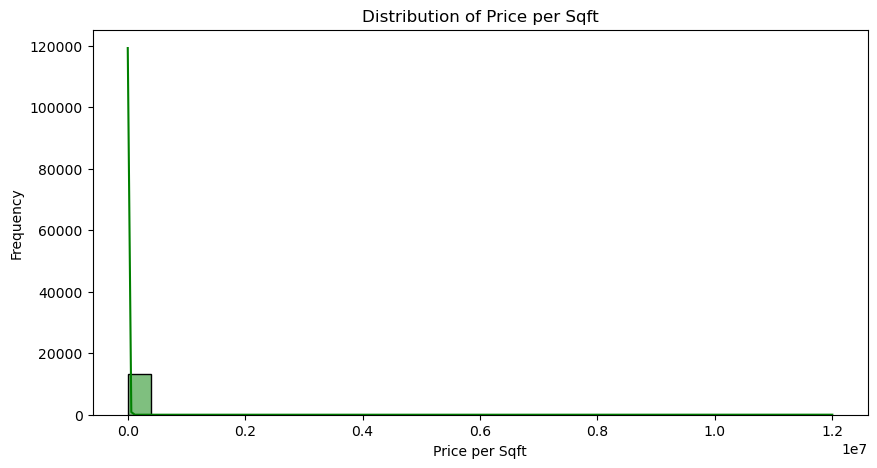

In [21]:
# Histogram of price per sqft
plt.figure(figsize=(10,5))
sns.histplot(df["price_per_sqft"], bins=30, kde=True, color="green")
plt.title("Distribution of Price per Sqft")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()

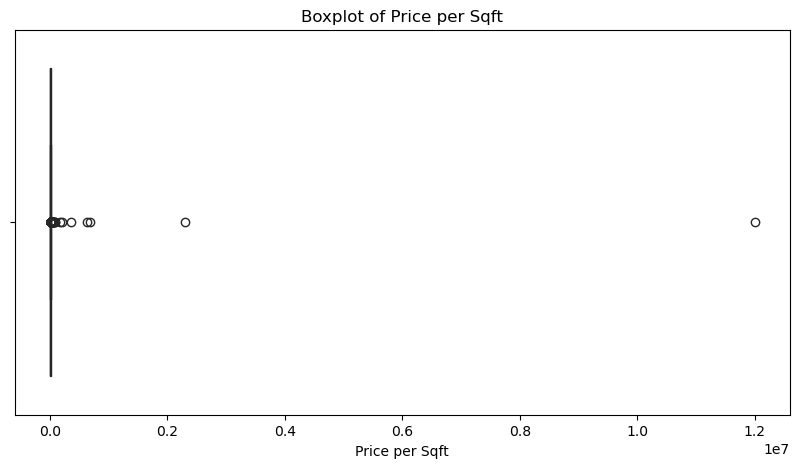

In [23]:
# Boxplot to detect outliers in price per sqft
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["price_per_sqft"], color="green")
plt.title("Boxplot of Price per Sqft")
plt.xlabel("Price per Sqft")
plt.show()

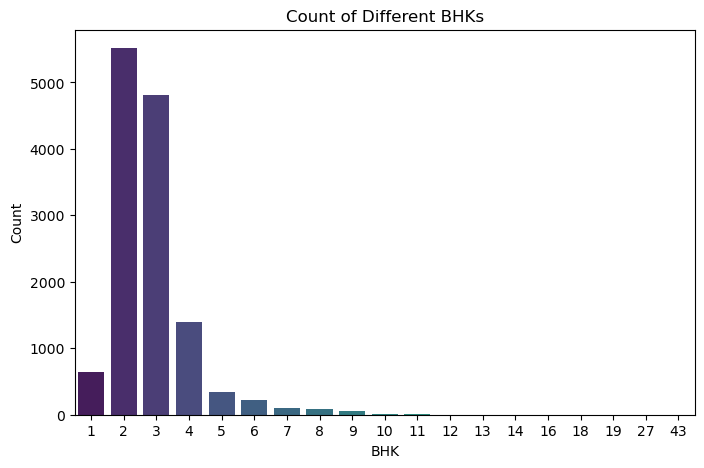

In [25]:
# Count plot for number of BHKs
plt.figure(figsize=(8, 5))
sns.countplot(x=df["bhk"], palette="viridis")
plt.title("Count of Different BHKs")
plt.xlabel("BHK")
plt.ylabel("Count")
plt.show()

Q2. Detecting the outliers and removing that using trimming/ capping/ imputation using mean or median
1.Mean and standard deviation
2.Percentile method
3.IQR(inter quartile range method)
4.Z score method

1.Mean and standard deviation method

In [27]:
# Calculate mean and standard deviation
mean_value = df["price_per_sqft"].mean()
std_dev_value = df["price_per_sqft"].std()

# Define threshold (3 standard deviations from mean)
lower_bound = mean_value - (3 * std_dev_value)
upper_bound = mean_value + (3 * std_dev_value)

# Detect outliers
outliers_std_dev = df[(df["price_per_sqft"] < lower_bound) | (df["price_per_sqft"] > upper_bound)]
print(f"Outliers detected using Mean & Std Dev: {len(outliers_std_dev)}")

Outliers detected using Mean & Std Dev: 5


In [29]:
# Trimming Remove outliers
df_trimmed_std = df[(df["price_per_sqft"] >= lower_bound) & (df["price_per_sqft"] <= upper_bound)]

In [31]:
# Imputation Replace outliers with mean
df_imputed_std = df.copy()
df_imputed_std.loc[(df["price_per_sqft"] < lower_bound) | (df["price_per_sqft"] > upper_bound), "price_per_sqft"] = mean_value

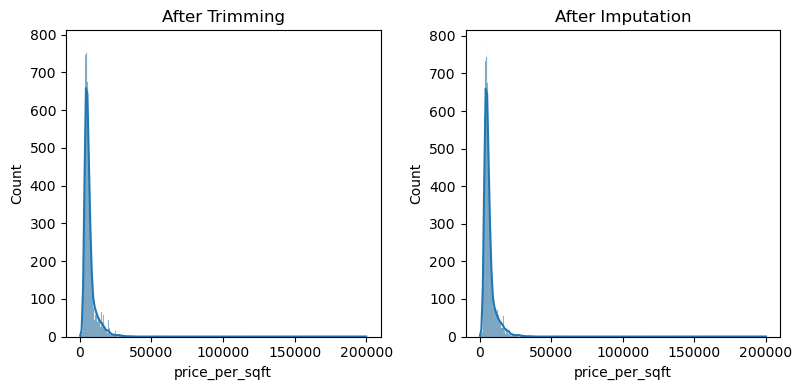

In [33]:
# Using hisplot to check the skewness

plt.figure(figsize=(12, 4))

# After Trimming
plt.subplot(1, 3, 1)
sns.histplot(df_trimmed_std["price_per_sqft"], kde=True)
plt.title("After Trimming")

# After imputation
plt.subplot(1, 3, 2)
sns.histplot(df_imputed_std["price_per_sqft"],  kde=True)
plt.title("After Imputation")

plt.tight_layout()
plt.show()

2. Percentile method

In [37]:
low_percentile = df["price_per_sqft"].quantile(0.05)
high_percentile = df["price_per_sqft"].quantile(0.95)

# Trimming
df_trimmed_percentile = df[(df["price_per_sqft"] >= low_percentile) & (df["price_per_sqft"] <= high_percentile)]

# Capping
df_capped_percentile = df.copy()
df_capped_percentile["price_per_sqft"] = np.clip(df["price_per_sqft"], low_percentile, high_percentile)

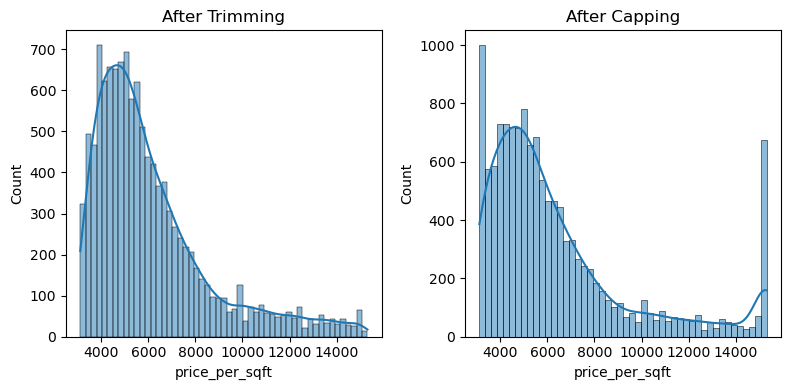

In [39]:
plt.figure(figsize=(12, 4))

# After Trimming
plt.subplot(1, 3, 1)
sns.histplot(df_trimmed_percentile["price_per_sqft"], kde=True)
plt.title("After Trimming")

# After imputation
plt.subplot(1, 3, 2)
sns.histplot(df_capped_percentile["price_per_sqft"],  kde=True)
plt.title("After Capping")

plt.tight_layout()
plt.show()

3 . IQR METHOD

In [41]:
Q1 = df["price_per_sqft"].quantile(0.25)
Q3 = df["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Trimming
df_trimmed_iqr = df[(df["price_per_sqft"] >= lower_bound) & (df["price_per_sqft"] <= upper_bound)]

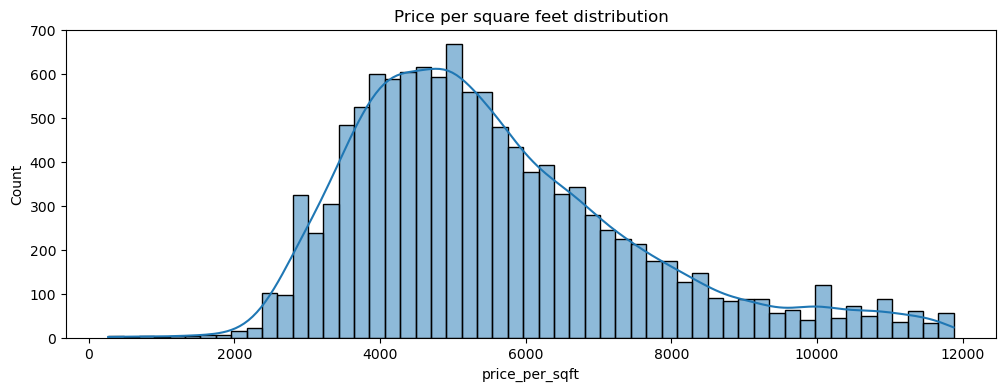

In [43]:
# After Trimming
plt.figure(figsize=(12, 4))
sns.histplot(df_trimmed_iqr["price_per_sqft"], kde=True)
plt.title("Price per square feet distribution")
plt.show()

4. Z score method

In [45]:
df["z_score"] = zscore(df["price_per_sqft"])
# Trimming
df_trimmed_z = df[(df["z_score"].abs() <= 3)]
df_trimmed_z = df_trimmed_z.drop(columns=["z_score"])

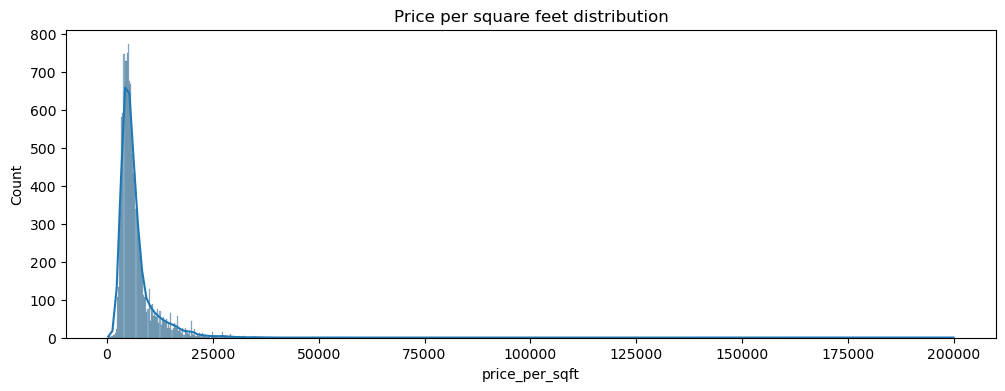

In [49]:
# After Trimming
plt.figure(figsize=(12, 4))
sns.histplot(df_trimmed_z["price_per_sqft"], kde=True)
plt.title("Price per square feet distribution")
plt.show()

Q3. Creating box plot for determine which method seems to work best to remove outliers of this data


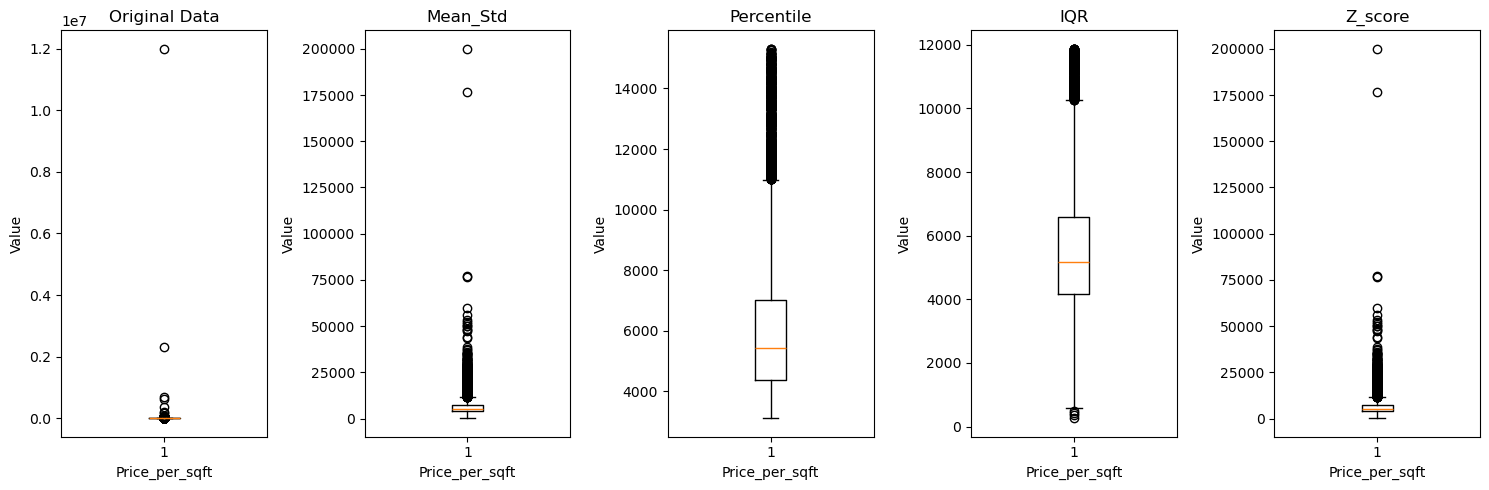

In [51]:
# create subplots
fig, axs = plt.subplots(1,5, figsize = (15,5))

# Boxplot for data 1
axs[0].boxplot(df['price_per_sqft'])
axs[0].set_title('Original Data')
axs[0].set_xlabel('Price_per_sqft')
axs[0].set_ylabel('Value')

# Box plot for data 2
axs[1].boxplot(df_trimmed_std['price_per_sqft'])
axs[1].set_title('Mean_Std')
axs[1].set_xlabel('Price_per_sqft')
axs[1].set_ylabel('Value')

# Box plot for data 3
axs[2].boxplot(df_trimmed_percentile['price_per_sqft'])
axs[2].set_title('Percentile')
axs[2].set_xlabel('Price_per_sqft')
axs[2].set_ylabel('Value')

# Box plot for data 4
axs[3].boxplot(df_trimmed_iqr['price_per_sqft'])
axs[3].set_title('IQR')
axs[3].set_xlabel('Price_per_sqft')
axs[3].set_ylabel('Value')

# Box plot for data 5
axs[4].boxplot(df_trimmed_z['price_per_sqft'])
axs[4].set_title('Z_score')
axs[4].set_xlabel('Price_per_sqft')
axs[4].set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()

Q4. Draw histplot to check the normality of the column(price per sqft column). Check the skewness and kurtosis before and after the transformation.

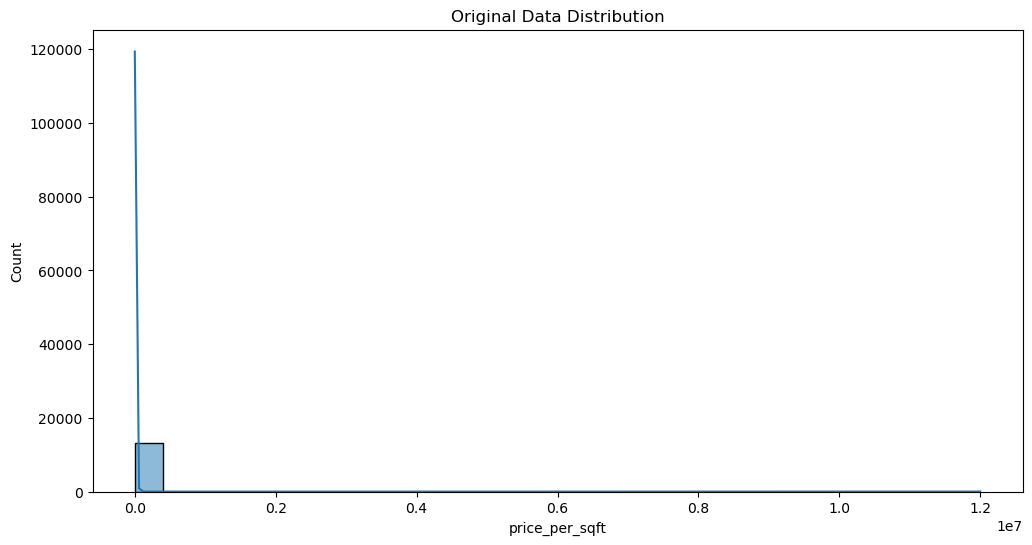

Skewness Before: 108.26875024325159
Kurtosis Before: 12090.633538860382


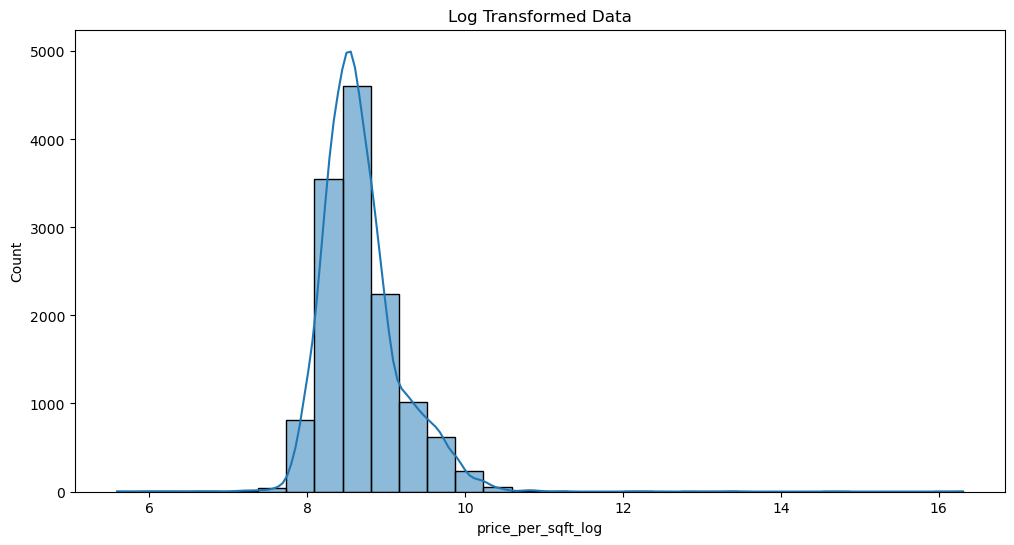

Skewness After: 1.4003259019533636
Kurtosis After: 9.203000543610957


In [58]:
# Original Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df["price_per_sqft"], bins=30, kde=True)
plt.title("Original Data Distribution")
plt.show()

# Skewness & Kurtosis Before transfromation
print("Skewness Before:", skew(df["price_per_sqft"]))
print("Kurtosis Before:", kurtosis(df["price_per_sqft"]))

# Apply Log Transformation
df["price_per_sqft_log"] = np.log1p(df["price_per_sqft"])

# Plot After Transformation
plt.figure(figsize=(12, 6))
sns.histplot(df["price_per_sqft_log"], bins=30, kde=True)
plt.title("Log Transformed Data")
plt.show()

# Skewness & Kurtosis After
print("Skewness After:", skew(df['price_per_sqft_log']))
print("Kurtosis After:", kurtosis(df['price_per_sqft_log']))

In [ ]:
Q5. Check the correlation between all the numerical columns and plot heatmap


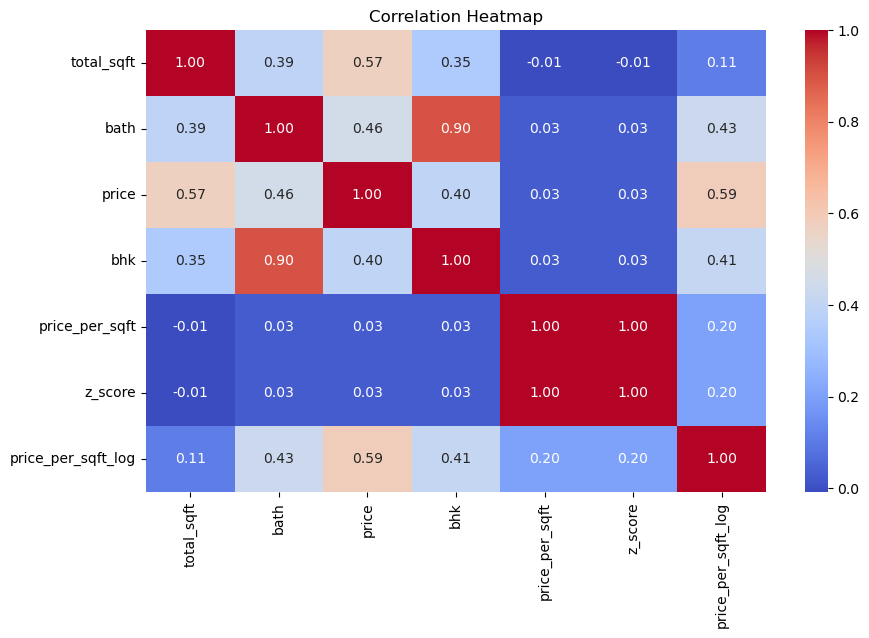

In [62]:
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True,  fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Q6. Draw Scatter plot between the variables to check the correlation between them

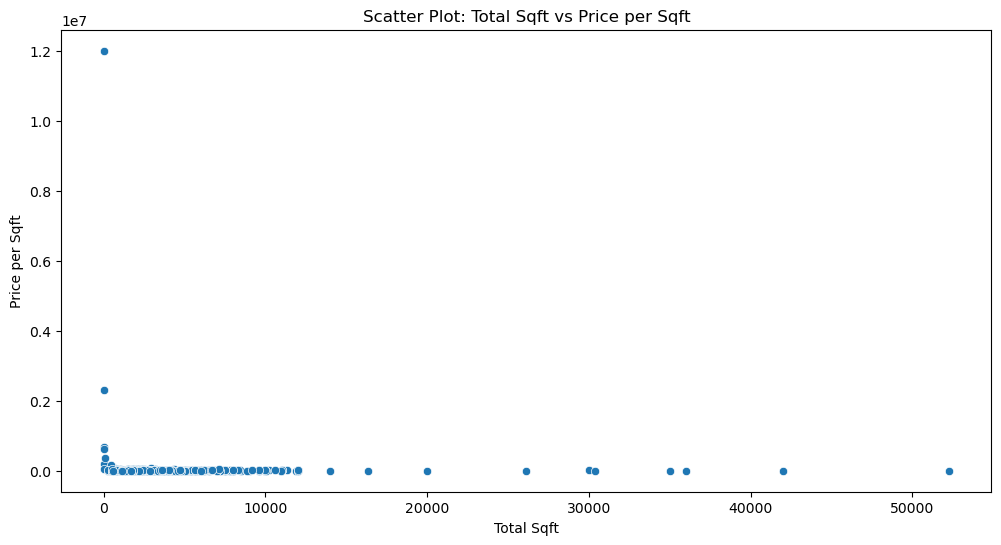

In [67]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["total_sqft"], y=df["price_per_sqft"])
plt.xlabel("Total Sqft")
plt.ylabel("Price per Sqft")
plt.title("Scatter Plot: Total Sqft vs Price per Sqft")
plt.show()